In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# 1. Carregando as bases

In [221]:
X_treino=pd.read_csv('X_train.csv')
X_valida=pd.read_csv('X_test.csv')
y_treino=pd.read_csv('y_train.csv')
y_valida=pd.read_csv('y_test.csv')
features=pd.read_csv('features.txt',header=None, delim_whitespace=True)
X_treino.drop(columns=['Unnamed: 0','ID'],inplace=True)
X_valida.drop(columns=['Unnamed: 0','ID'],inplace=True)
y_valida=y_valida['0']

# 2. Calculando os ccp_alphas

In [196]:
x_melhores_var=X_treino[['tGravityAcc-min()-X','fBodyAcc-mean()-X','angle(Y,gravityMean)']]
X_valida=X_valida[['tGravityAcc-min()-X','fBodyAcc-mean()-X','angle(Y,gravityMean)']]
y_melhores_var=y_treino['0']

- Usando as três variavéis de maior importancia identificada no exercicio anterior

In [197]:
%%time
clf=DecisionTreeClassifier(min_samples_leaf=20,random_state=42)



CPU times: total: 0 ns
Wall time: 0 ns


# 3. Grid Search

In [198]:
caminho=clf.cost_complexity_pruning_path(x_melhores_var,y_melhores_var)
ccp_alphas,impurities=caminho.ccp_alphas[::10],caminho.impurities

In [199]:
ccp_alpha=np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alpha

array([0.00000000e+00, 1.01582623e-05, 4.75633208e-05, 1.03726254e-04,
       1.75776346e-04, 2.75465650e-04, 5.12960437e-04, 7.71217104e-04,
       1.09014169e-03, 2.16385984e-03, 6.88407984e-03])

In [200]:
clf=DecisionTreeClassifier(random_state=42)

In [201]:
grid_parametros={'ccp_alpha':ccp_alpha}


In [202]:
grid=GridSearchCV(estimator=clf,param_grid=grid_parametros,cv=10,verbose=100)
grid.fit(x_melhores_var,y_melhores_var)


Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START ccp_alpha=0.0.............................................
[CV 1/10; 1/11] END ...........................ccp_alpha=0.0; total time=   0.0s
[CV 2/10; 1/11] START ccp_alpha=0.0.............................................
[CV 2/10; 1/11] END ...........................ccp_alpha=0.0; total time=   0.0s
[CV 3/10; 1/11] START ccp_alpha=0.0.............................................
[CV 3/10; 1/11] END ...........................ccp_alpha=0.0; total time=   0.0s
[CV 4/10; 1/11] START ccp_alpha=0.0.............................................
[CV 4/10; 1/11] END ...........................ccp_alpha=0.0; total time=   0.0s
[CV 5/10; 1/11] START ccp_alpha=0.0.............................................
[CV 5/10; 1/11] END ...........................ccp_alpha=0.0; total time=   0.0s
[CV 6/10; 1/11] START ccp_alpha=0.0.............................................
[CV 6/10; 1/11] END ..........................

[CV 1/10; 6/11] END .........ccp_alpha=0.0002754656498527462; total time=   0.0s
[CV 2/10; 6/11] START ccp_alpha=0.0002754656498527462...........................
[CV 2/10; 6/11] END .........ccp_alpha=0.0002754656498527462; total time=   0.0s
[CV 3/10; 6/11] START ccp_alpha=0.0002754656498527462...........................
[CV 3/10; 6/11] END .........ccp_alpha=0.0002754656498527462; total time=   0.0s
[CV 4/10; 6/11] START ccp_alpha=0.0002754656498527462...........................
[CV 4/10; 6/11] END .........ccp_alpha=0.0002754656498527462; total time=   0.0s
[CV 5/10; 6/11] START ccp_alpha=0.0002754656498527462...........................
[CV 5/10; 6/11] END .........ccp_alpha=0.0002754656498527462; total time=   0.0s
[CV 6/10; 6/11] START ccp_alpha=0.0002754656498527462...........................
[CV 6/10; 6/11] END .........ccp_alpha=0.0002754656498527462; total time=   0.0s
[CV 7/10; 6/11] START ccp_alpha=0.0002754656498527462...........................
[CV 7/10; 6/11] END ........

[CV 10/10; 11/11] END ........ccp_alpha=0.006884079844198691; total time=   0.0s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.01582623e-05, 4.75633208e-05, 1.03726254e-04,
       1.75776346e-04, 2.75465650e-04, 5.12960437e-04, 7.71217104e-04,
       1.09014169e-03, 2.16385984e-03, 6.88407984e-03])},
             verbose=100)

In [203]:
resultados=pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030932,0.019971,0.002101,0.000539,0.0,{'ccp_alpha': 0.0},0.796196,0.737772,0.813605,0.684354,0.763265,0.770068,0.774150,0.755102,0.827211,0.759184,0.768091,0.038210,7
1,0.026198,0.003189,0.001799,0.000870,0.00001,{'ccp_alpha': 1.0158262282888679e-05},0.796196,0.737772,0.813605,0.684354,0.763265,0.770068,0.774150,0.755102,0.827211,0.759184,0.768091,0.038210,7
2,0.024686,0.003549,0.003298,0.004624,0.000048,{'ccp_alpha': 4.7563320809465614e-05},0.796196,0.737772,0.813605,0.684354,0.763265,0.770068,0.774150,0.755102,0.827211,0.759184,0.768091,0.038210,7
3,0.024836,0.003960,0.003199,0.003992,0.000104,{'ccp_alpha': 0.00010372625405975604},0.796196,0.737772,0.813605,0.684354,0.763265,0.770068,0.774150,0.755102,0.827211,0.759184,0.768091,0.038210,7
4,0.024786,0.004353,0.001699,0.000781,0.000176,{'ccp_alpha': 0.00017577634552607378},0.804348,0.748641,0.828571,0.693878,0.782313,0.774150,0.785034,0.770068,0.835374,0.756463,0.777884,0.038848,5
5,0.031182,0.008825,0.002900,0.001221,0.000275,{'ccp_alpha': 0.0002754656498527462},0.798913,0.756793,0.834014,0.706122,0.793197,0.774150,0.809524,0.772789,0.835374,0.760544,0.784142,0.036982,3
6,0.024835,0.003208,0.001800,0.000400,0.000513,{'ccp_alpha': 0.0005129604371121416},0.755435,0.740489,0.816327,0.726531,0.757823,0.774150,0.790476,0.745578,0.840816,0.752381,0.770001,0.034096,6
7,0.027884,0.003751,0.002000,0.000999,0.000771,{'ccp_alpha': 0.0007712171042603484},0.767663,0.730978,0.793197,0.727891,0.763265,0.768707,0.785034,0.710204,0.851701,0.757823,0.765646,0.037844,11
8,0.025279,0.004575,0.001899,0.000943,0.00109,{'ccp_alpha': 0.0010901416898242422},0.798913,0.745924,0.805442,0.740136,0.778231,0.767347,0.838095,0.703401,0.862585,0.770068,0.781014,0.044799,4
9,0.024007,0.003409,0.001599,0.000663,0.002164,{'ccp_alpha': 0.0021638598375210427},0.846467,0.808424,0.814966,0.763265,0.727891,0.751020,0.821769,0.706122,0.857143,0.786395,0.788346,0.047730,2


In [204]:
grid.best_params_

{'ccp_alpha': 0.006884079844198691}

In [205]:
grid.best_score_

0.810384131913635

In [206]:
melhor_ccp=resultados.iloc[grid.best_index_,4]
melhor_ccp


0.006884079844198691

In [207]:
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=melhor_ccp).fit(x_melhores_var,y_melhores_var)

# 4. Avaliando a arvore

In [208]:
acuracia_modelo1=clf.score(X_valida,y_valida)

In [209]:
y_pred=clf.predict(X_valida)

In [210]:
print(confusion_matrix(y_valida,y_pred))

[[269 187  40   0   0   0]
 [122 330  19   0   0   0]
 [139  70 211   0   0   0]
 [  0   0   0 400  91   0]
 [  0   0   0 107 425   0]
 [  0   0   0   0   0 537]]


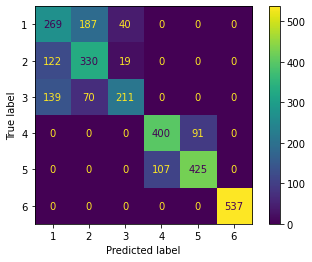

In [211]:
cm = confusion_matrix(y_valida, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

- Modelo criado a partir das três variavéis com maior importancia. É possível verificar que o modelo tem uma certa dificuldade para classificar atividade 1,2 e 3 fazendo uma confusão ao tentar prever atividade de um novo individuo. 


# 5. Melhorando a arvore

In [212]:
nome_coluna=features[1]
nome_coluna

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
                       ...                 
556        angle(tBodyGyroMean,gravityMean)
557    angle(tBodyGyroJerkMean,gravityMean)
558                    angle(X,gravityMean)
559                    angle(Y,gravityMean)
560                    angle(Z,gravityMean)
Name: 1, Length: 561, dtype: object

In [213]:
clf=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20 ,random_state=42)


In [214]:
clf=clf.fit(X_treino,y_treino)
importancias = clf.feature_importances_

In [244]:
importancia=pd.DataFrame(importancias,index=nome_coluna)
print(f'As seis variavéis com maior importancia:\n',importancia.sort_values(by=0,ascending=False).head(6))

As seis variavéis com maior importancia:
                                     0
1                                    
tGravityAcc-min()-X          0.283236
fBodyAcc-mean()-X            0.254527
angle(Y,gravityMean)         0.166498
fBodyAccMag-energy()         0.138357
tGravityAcc-arCoeff()-Z,2    0.121692
tBodyGyro-correlation()-Y,Z  0.018129


In [222]:
x_best_var=X_treino[['tGravityAcc-min()-X','fBodyAcc-mean()-X','angle(Y,gravityMean)',
                     'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2','tBodyGyro-correlation()-Y,Z']]
X_valida=X_valida[['tGravityAcc-min()-X','fBodyAcc-mean()-X','angle(Y,gravityMean)','fBodyAccMag-energy()',
                   'tGravityAcc-arCoeff()-Z,2','tBodyGyro-correlation()-Y,Z']]
y_best_var=y_treino['0']

In [223]:
clf=DecisionTreeClassifier(max_depth=4,min_samples_leaf=20,random_state=42)
clf.fit(x_best_var,y_best_var)
y_pred=clf.predict(X_valida)

In [224]:
acuracia_modelo2=clf.score(X_valida,y_valida)
acuracia_modelo2

0.8130302002035968

In [225]:
print(confusion_matrix(y_valida,y_pred))

[[437  48  11   0   0   0]
 [129 336   6   0   0   0]
 [107  52 261   0   0   0]
 [  0   0   0 400  91   0]
 [  0   0   0 107 425   0]
 [  0   0   0   0   0 537]]


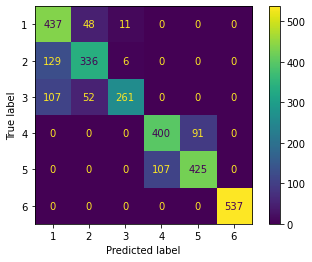

In [226]:
cm = confusion_matrix(y_valida, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [233]:
diferenca=acuracia_modelo2 - acuracia_modelo1

In [240]:
print(f'A melhora de um modelo para o outro foi de :%.2f%%'% (diferenca*100))

A melhora de um modelo para o outro foi de :7.60%


- É possível verificar uma melhora na classificação das atividades 1,2 e 3 ao incluir as seis variavéis com maior importancia no modelo, diminuindo a quantidade de erros em novas previsões.  

1 WALKING - ANDANDO
2 WALKING_UPSTAIRS - SUBIR AS ESCADAS
3 WALKING_DOWNSTAIRS - DESCENDO AS ESCADAS
4 SITTING - SENTADO
5 STANDING - DE PÉ
6 LAYING - DEITADO